# <u><i> Final Report For " Predicting Electric Scooter Usage Competition" - Machine learning @ vrije universiteit brussel </i></u>
### Author : Heithem Tarchouna
### Student Id : 0598717



In [1]:
# colab library 

# numerical library:
import numpy as np
import math

# data manipulation library:
import pandas as pd

# standard packages used to handle files:
import sys
import os 
import glob
import time
import datetime
from datetime import datetime
# scikit-learn machine learning library:
import sklearn

# plotting:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# model preprocessing 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Determining distribution of data 
from fitter import Fitter, get_common_distributions, get_distributions
from scipy import stats

# models used
# Unsupervised Learning
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Supervised Learning
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor)
#import lazypredict
import lightgbm as ltb
from lazypredict.Supervised import LazyRegressor

# deep learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


# models evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score



In [2]:
#import datasets from datasets folder using pandas 
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

<a id ='eda'> </a>

## Exploratory Data Analysis

In [3]:
train_data

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,E-scooter Count
0,07/10/2018,22,13.60,38,1.50,2000,-0.40,0.00,0.00,0.00,Autumn,No Holiday,Yes,1160
1,04/02/2018,0,-10.40,49,2.40,2000,-19.00,0.00,0.00,0.00,Winter,No Holiday,Yes,98
2,31/07/2018,20,33.50,50,2.10,2000,21.60,0.04,0.00,0.00,Summer,No Holiday,Yes,1772
3,15/09/2018,0,21.80,83,1.50,2000,18.70,0.00,0.00,0.00,Autumn,No Holiday,Yes,906
4,10/03/2018,6,1.10,78,1.10,538,-2.30,0.00,0.00,0.00,Spring,No Holiday,Yes,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,19/08/2018,11,28.40,43,1.00,1914,14.60,1.52,0.00,0.00,Summer,No Holiday,Yes,795
4996,06/01/2018,19,-1.20,37,1.20,1663,-14.00,0.00,0.00,0.00,Winter,No Holiday,Yes,207
4997,16/11/2018,12,13.40,48,2.30,962,2.50,1.64,0.00,0.00,Autumn,No Holiday,Yes,886
4998,23/01/2018,3,-8.60,68,3.30,2000,-13.40,0.00,0.00,1.00,Winter,No Holiday,Yes,55


We can observe that our data is devided into two categories based on the "Functioning Day" feature: <br>
- "Yes" which implies that the scooters were allowed to be working on the city during that day hence this is exactly the data that we want to use to train our model <br>
- "No" which implies that the E-scooters count or our label will be 0 <br>
<br>
<b> Decision :  </b> <br>
- based on this information i will split train dataset into two smaller datasets : functioning days and not.<br>
--> The reason for this, is to enable optimal training of the model during the days that actually matter for us (if it's no then the label will be automatically 0). <br>
--> Leaving those datapoints on the train dataset will impact negatively the model (as they can be considered outliers )

In [4]:
train_data[train_data['Functioning Day']=='Yes'].describe()

,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),E-scooter Count
count,4829.00,4829.00,4829.00,4829.00,4829.00,4829.00,4829.00,4829.00,4829.00,4829.00
mean,11.56,12.70,58.19,1.72,1430.26,3.87,0.56,0.17,0.08,729.11
std,6.94,12.16,20.42,1.03,611.33,13.29,0.87,1.26,0.43,644.48
min,0.00,-17.50,0.00,0.00,27.00,-29.80,0.00,0.00,0.00,2.00
25%,6.00,2.90,42.00,1.00,927.00,-5.30,0.00,0.00,0.00,212.00
50%,12.00,13.40,57.00,1.50,1680.00,4.60,0.01,0.00,0.00,540.00
75%,18.00,22.70,74.00,2.30,2000.00,15.20,0.91,0.00,0.00,1088.00
max,23.00,39.40,98.00,7.30,2000.00,27.20,3.52,35.00,8.80,3556.00


- The target variable (E-scooter Count) which refers to the number e-scooters used at a particular hour (over the duration of 2 years) ranges between 2 to 3404
- Its mean is 725
- Its median is 535.5
- Its 75th percentile is 1076
<br><br>
<b>Hypothesis:</br> This is suggestes that the data is dense at lower values and it's gradually less dense as the values of e-scooter counts grow
This is kinda expected as usually there are some peek hours where e-scooters are being used (probably morning until 18:00) </b>

**Question : How many Hour samples do we have per day ?**


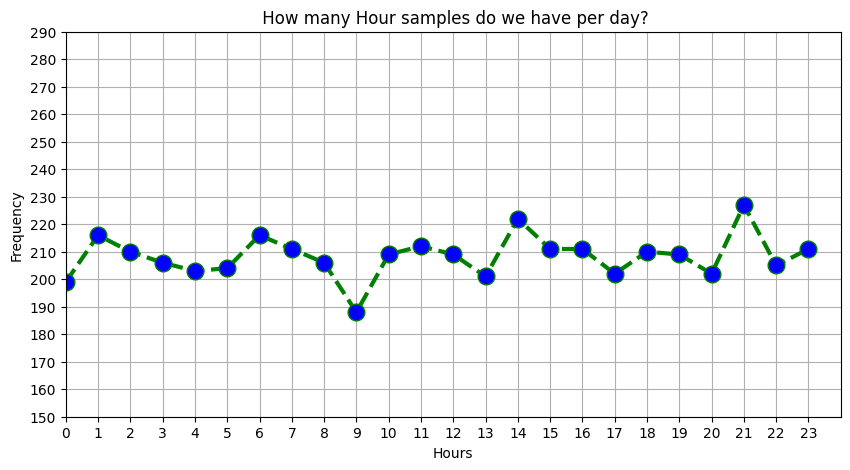

In [5]:
temp = pd.DataFrame(train_data["Hour"].value_counts()).reset_index().sort_values(by="index")
# x axis values
x = temp["index"]
# corresponding y axis values
y = temp["Hour"]
plt.figure(figsize=(10,5))

# plotting the points 
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
  
# setting x and y axis range
plt.xlim(0,24)
plt.xticks([i for i in range(0,24)])
plt.yticks([10 * i for i in range(15,30)])

# naming the x axis
plt.xlabel('Hours')
# naming the y axis
plt.ylabel('Frequency')
plt.grid(True)
# giving a title to my graph
plt.title(' How many Hour samples do we have per day?')
# function to show the plot
plt.show()

<br> Answer :<br> -We can observe that for some days we have more hours (data points) than for others.
<br> -->Our dataset is an irregular timeseries.
<br> Although my first intuition is train a LSTM model for this regression problem, the fact that our data is an irregular timeseries will make it much diffuclt to set a specific size of a windoww (hours/days) to predict the next datapoint and hence this model choise might not be ideal for this problem.

Question : What does the distribution of E-Scooter Counts look like ?<br>


In [6]:
functioning_day = train_data[train_data['Functioning Day']=='Yes']
#convert date to datetime of the format YYYY-MM-DD
functioning_day['Date'] = pd.to_datetime(functioning_day['Date'])
functioning_day['Year'] = pd.DatetimeIndex(functioning_day['Date']).year
functioning_day['Month'] = pd.DatetimeIndex(functioning_day['Date']).month
functioning_day['Day'] = pd.DatetimeIndex(functioning_day['Date']).day
functioning_day = functioning_day.sort_values(by=['Year','Month','Date','Hour'])

#add feature number of days in the year (0-365)
functioning_day['DayOfYear'] = functioning_day['Date'].dt.dayofyear



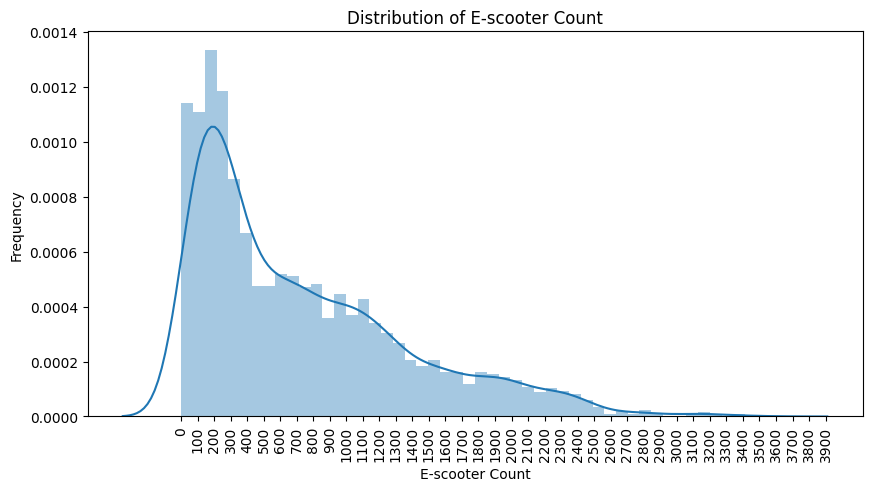

In [7]:
# plot the distribution of the data based on the day,hour and e-scooter count
plt.figure(figsize=(10,5))
sns.distplot(functioning_day['E-scooter Count'], bins=50, kde=True)
plt.title('Distribution of E-scooter Count')
plt.xlabel('E-scooter Count')
plt.xticks([i for i in range(0,4000,100)])
#rotating the xticks
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

The data is skewed at lower values so we might need to apply the log(x+1) function since the variable contains 0, this will also make the data more normally distributed.
The reason for chosing this function is the fact the number of E-scooters can be 0  (is never negative) so this function will ensure that data is normally distributed and log function never blows up.
This will lead us to using exp(x)-1 to inverse this transformation.

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.75it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.00,1818.63,-108913.25,inf,0.04,0.00
expon,0.00,1810.60,-108838.12,inf,0.04,0.00
exponpow,0.00,1764.54,-103965.23,inf,0.14,0.00
rayleigh,0.00,1942.44,-100073.97,inf,0.15,0.00
powerlaw,0.00,1685.40,-99944.48,inf,0.21,0.00


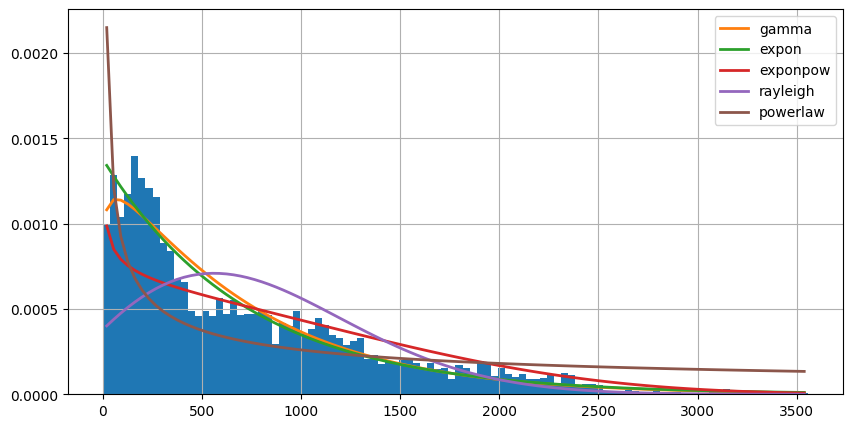

In [8]:
e_scooter = functioning_day["E-scooter Count"].values

plt.figure(figsize=(10,5))
f = Fitter(e_scooter,
           distributions= get_common_distributions())
f.fit()
f.summary()
f.fit()
f.summary()

In [9]:
f.get_best(method = 'sumsquare_error')


{'gamma': {'a': 1.0985836210917521,
  'loc': 1.9533041976987788,
  'scale': 661.9027951842228}}

Data follows the gamma distribution which confirms our first hypothesis of the data being skewed near 0 and then gradually decreasing.<br>
-Also this gives an idea that using a gamma regression model or a generalization of it, such as a generalized linear model (GLM) with a gamma distribution might be worth trying.


# The goal of this section to capture the seasonality patterns in the data
**Question: what does the relationship between the Hour / Day/Month and the E scooter Count look like ?**<br><br>


Checking the seasonality in terms of day :

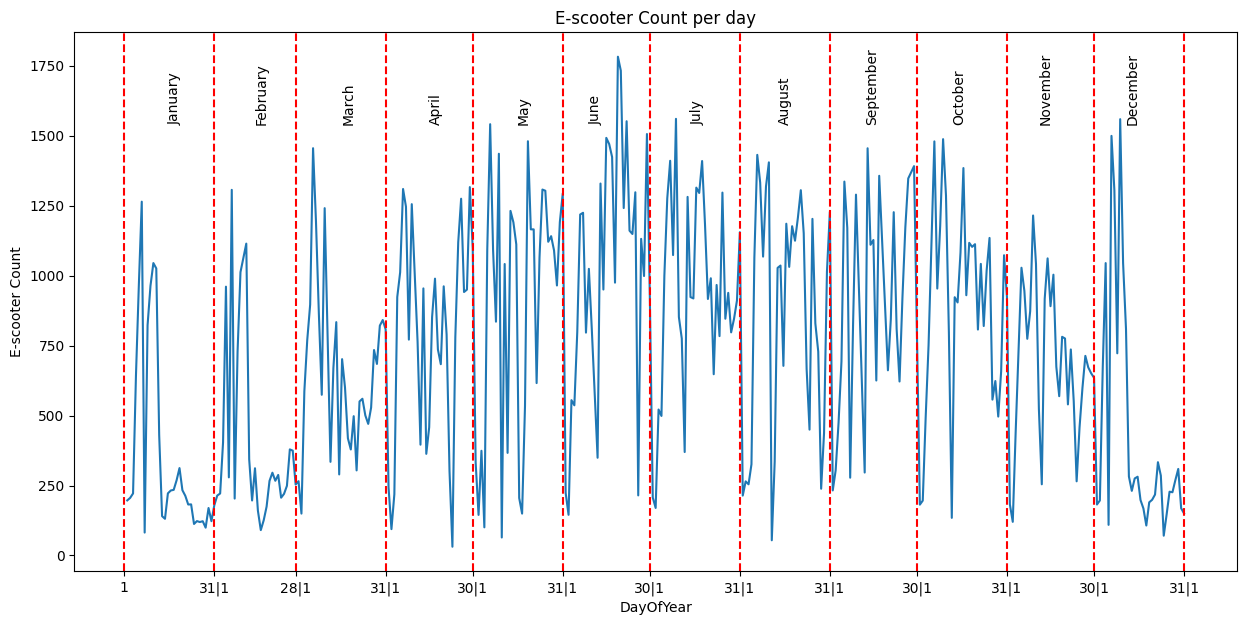

In [10]:
#plot groupby date
plt.figure(figsize=(15,7))
functioning_day.groupby('DayOfYear')['E-scooter Count'].mean().plot()
plt.title('E-scooter Count per day')
plt.xlabel('DayOfYear')
# make xticks corresponding to the month
plt.xticks([0,31,59,90,120,151,181,212,243,273,304,334,365])
ax = plt.gca()
ax.set_xticklabels(['1','31|1','28|1','31|1','30|1','31|1','30|1','31|1','31|1','30|1','31|1','30|1','31|1'])




# separating each month
plt.axvline(x=0, color='r', linestyle='--')

plt.axvline(x=31, color='r', linestyle='--')#january
plt.axvline(x=59, color='r', linestyle='--')#february
plt.axvline(x=90, color='r', linestyle='--')#march
plt.axvline(x=120, color='r', linestyle='--')#april
plt.axvline(x=151, color='r', linestyle='--')#may
plt.axvline(x=181, color='r', linestyle='--')#june
plt.axvline(x=212, color='r', linestyle='--')#july
plt.axvline(x=243, color='r', linestyle='--')#august
plt.axvline(x=273, color='r', linestyle='--')#september
plt.axvline(x=304, color='r', linestyle='--')#october
plt.axvline(x=334, color='r', linestyle='--')#november
plt.axvline(x=365, color='r', linestyle='--')#december
# The text for each month is written on the plot at the end of each month (make it small)
plt.text(15, 1550, 'January', rotation=90)
plt.text(45, 1550, 'February', rotation=90)
plt.text(75, 1550, 'March', rotation=90)
plt.text(105, 1550, 'April', rotation=90)
plt.text(135, 1550, 'May', rotation=90)
plt.text(160, 1550, 'June', rotation=90)
plt.text(195, 1550, 'July', rotation=90)
plt.text(225, 1550, 'August', rotation=90)
plt.text(255, 1550, 'September', rotation=90)
plt.text(285, 1550, 'October', rotation=90)
plt.text(315, 1550, 'November', rotation=90)
plt.text(345, 1550, 'December', rotation=90)


plt.ylabel('E-scooter Count')
plt.show()


We can observe that there are multiple patterns in the data about E-scooter count : <br>
- Peeks at the start of the month then starts declining : [ January, February,March, May, July,August,October,November,December]
- Starts Slow then peeks: [June ,September,April]

In [11]:
df = functioning_day.copy()
# Create a new column to indicate whether the day is at the start of the month
df['start_of_month'] = df['Date'].dt.day == 1

# Create a new column to indicate whether the month is April, June, July, or September
df['non_peak_months'] = df['Date'].dt.month.isin([4, 6, 7, 9])

# Create a new column to indicate the peak of the month
df['peak_of_month'] = (~df['non_peak_months']) & df['start_of_month']

# Drop unnecessary columns
df.drop(['Date', 'start_of_month', 'non_peak_months'], axis=1, inplace=True)

### Checking the seasonality in terms of months

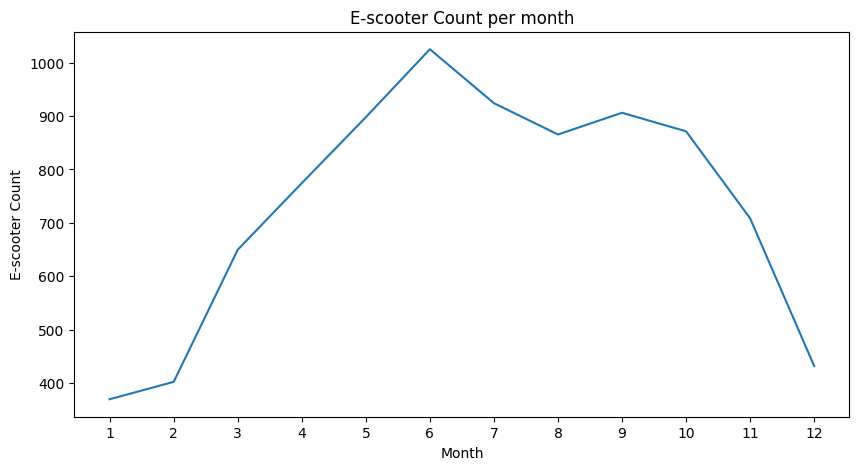

In [12]:

functioning_day.Date = pd.to_datetime(functioning_day.Date)
# plot groupby month
plt.figure(figsize=(10,5))
functioning_day.groupby(functioning_day.Date.dt.month)['E-scooter Count'].mean().plot()
plt.title('E-scooter Count per month')
plt.xlabel('Month')
plt.xticks([i for i in range(1,13)])
plt.ylabel('E-scooter Count')
plt.show()


This is almost like a normal distribution that peeks at the month 6. We still need to verify this assumption : <br>
For that we will perform the Anderson-Darling test on the 'E-scooter Count' column. <br>
The Anderson-Darling test bascially follows this idea : It measures the goodness of fit of a sample to a specific probability distribution and it often used to determine wether this sample data is normally distributed or no.

In [13]:

# Perform the Anderson-Darling test on the 'E-scooter Count' column
result = stats.normaltest(functioning_day.groupby(functioning_day.Date.dt.month)['E-scooter Count'].mean().values)

print(f'Test statistic: {result.statistic}')
print(f'p-value: {result.pvalue}')

if result.pvalue < 0.05:
    print("The null hypothesis can be rejected, the data is not normally distributed.")
else:
    print("The null hypothesis cannot be rejected, the data may be normally distributed.")

Test statistic: 1.915042938229591
p-value: 0.38384307486855945
The null hypothesis cannot be rejected, the data may be normally distributed.


In [14]:
from scipy.stats import norm
# estimate parameters of the normal distribution
mean_of_population, std_of_propulation = norm.fit(functioning_day.groupby(functioning_day.Date.dt.month)['E-scooter Count'].mean())


In [15]:
print(f'Mean: {mean_of_population}')
print(f'Standard deviation: {std_of_propulation}')


Mean: 735.6041224813926
Standard deviation: 215.34004457921904


Our assumption is reasonable therefore we can transform this information into multiple features :
- if it's in june than the binary feature peak-month will be 1.
- the distance from the peek simply indicates how far is any given month from june.
- we take the inverse of the distance from peek to indicate that the closer we are to the peak month, the higher the value of the e-scooter count is.
- normal distribution is simply a column that indicates the normal distribution

In [16]:
#group by month
# Date as datetime
temp = train_data[train_data['Functioning Day']=='Yes']
#convert date to datetime of the format YYYY-MM-DD
temp['Date'] = pd.to_datetime(temp['Date'])
temp['Year'] = pd.DatetimeIndex(temp['Date']).year
temp['Month'] = pd.DatetimeIndex(temp['Date']).month
temp['Day'] = pd.DatetimeIndex(temp['Date']).day
temp = functioning_day.sort_values(by=['Year','Month','Date','Hour'])

#add feature number of days in the year (0-365)
temp['DayOfYear'] = temp['Date'].dt.dayofyear

df_monthly = temp.groupby(temp["Date"].dt.month).mean()

# Create a new column to indicate the month of the year
df_monthly['month'] = df_monthly.index

# Create a new column to indicate the peak month (6th month)
df_monthly['peak_at_start_of_month'] = df_monthly['month'] == 6

# Create a new column to indicate the distance from the peak month
df_monthly['distance_from_peak'] = abs(df_monthly['month'] - 6)

# Create a new column to indicate the inverse distance from the peak month
df_monthly['inverse_distance_from_peak'] = 1 / (df_monthly['distance_from_peak'] + 1)

# Create a new column to indicate the normal distribution
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

df_monthly['normal_distribution'] = normal_dist(df_monthly['distance_from_peak'], mean_of_population, std_of_propulation)

# Drop unnecessary columns
df_monthly.drop(['month','distance_from_peak'], axis=1, inplace=True)

In [17]:
merged_df = pd.merge(functioning_day, df_monthly[["peak_at_start_of_month","inverse_distance_from_peak","normal_distribution","Month"]], left_on='Month', right_on='Month', how='left')

### Checking the seasonality in terms of Hours per day

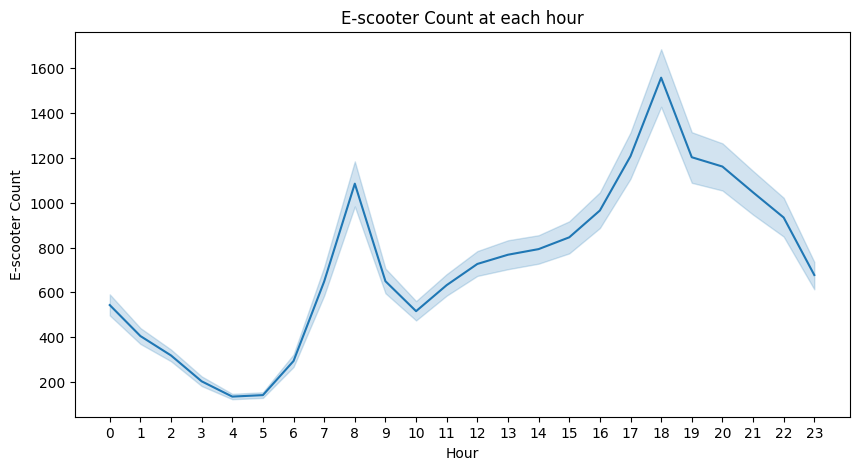

In [18]:
# plot the data at each hour and the e-scooter count
plt.figure(figsize=(10,5))
sns.lineplot(x='Hour', y='E-scooter Count', data=functioning_day)
plt.title('E-scooter Count at each hour')
plt.xlabel('Hour')
plt.xticks([i for i in range(0,24)])
plt.ylabel('E-scooter Count')
plt.show()

In [19]:
merged_df["Rush_Hours"] = merged_df["Hour"].apply(lambda hour:1 if (hour in range(6,10) or hour in range(17,21)) else 0 )


Answer : There seems to be a pattern emerging (a seasonality at the hourly level) : <br>
- Growing number of e scooters from 5 to 8  where it peeks (assumption : when people go to work/school)<br>
- Decrease in the number of e scooters in between 8 and 10 
- steady increase from 10 to 16 then the rate increase grows fast from 17 to 18 where it peeks again(assumptions: people going home or out).
- Decrease after that
- this gives me an indication to create a new feature called rush hours that help models detect this seasonality

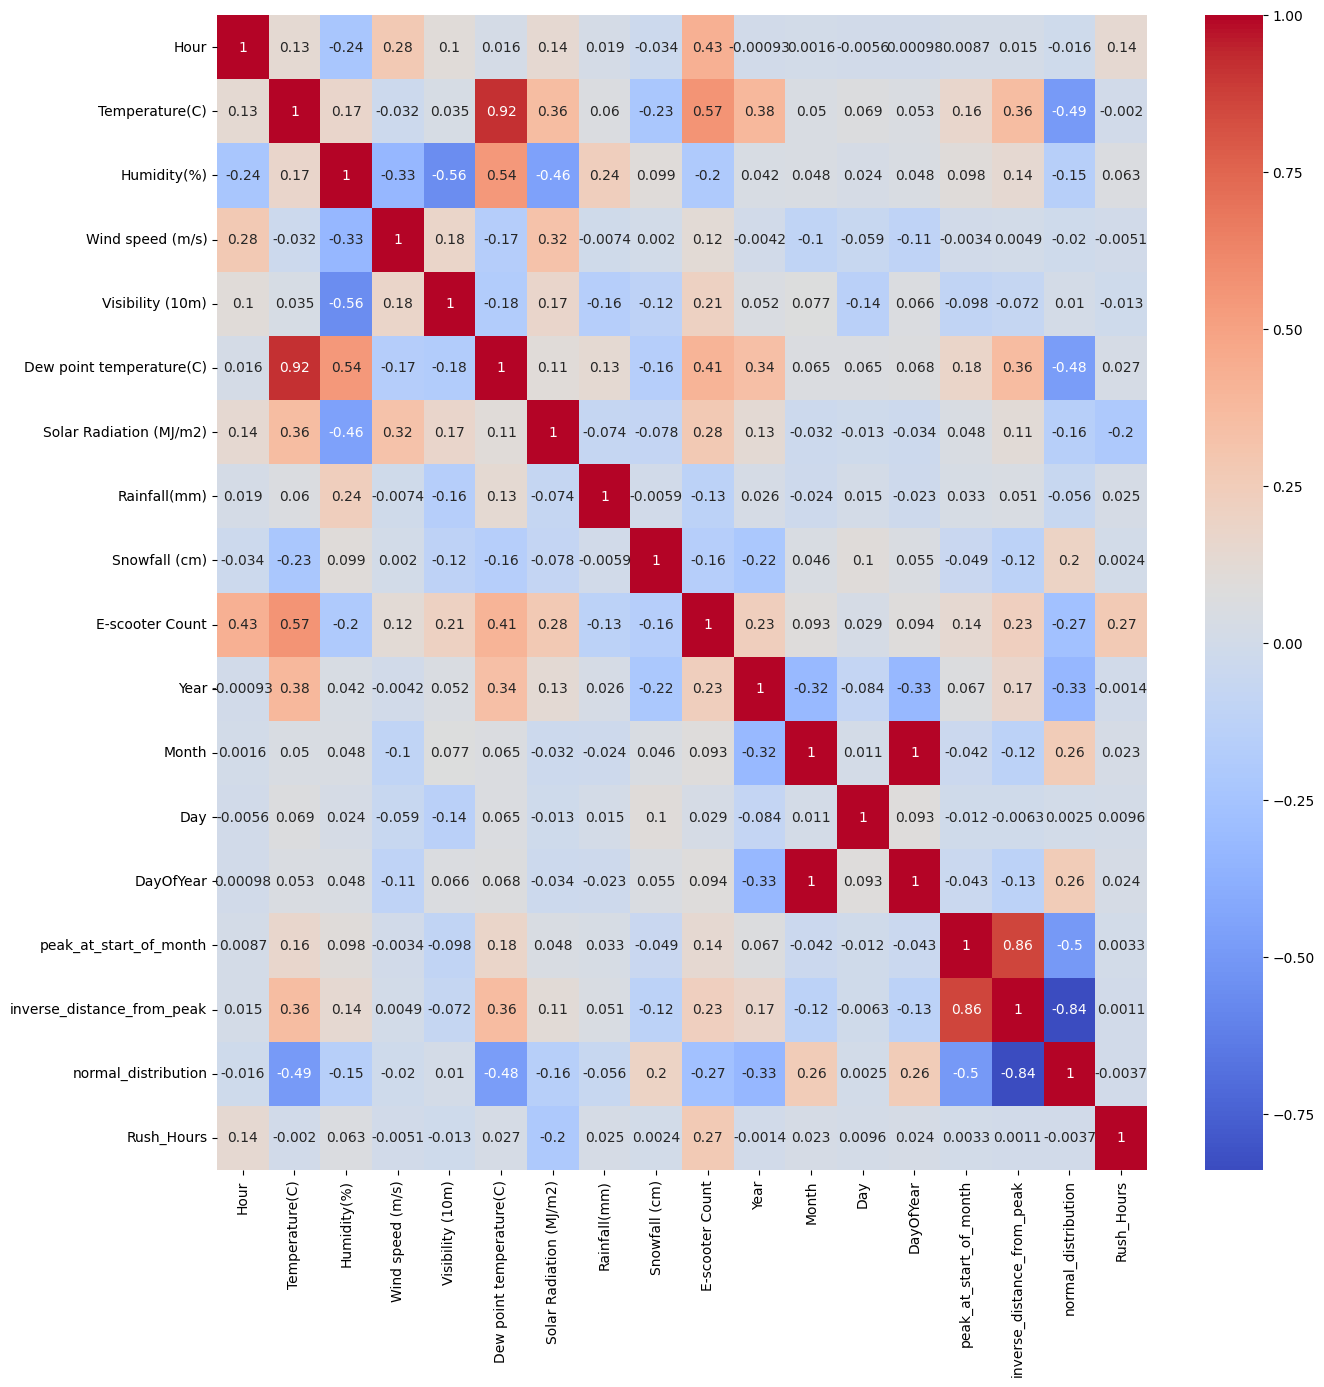

In [20]:
# correlation matrix
corr = merged_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


### Indeed the feature that we created offer good correlation with the E-scooter count and therefore will be used by the models of making predictions

Question : What is the effect of weather on the number of e-scooters?

In [21]:
functioning_days = merged_df
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
functioning_days['WeekDay'] = functioning_days.Date.dt.dayofweek
functioning_days['WeekDay'] = functioning_days['WeekDay'].map(lambda x : weekdays[x])
functioning_days = functioning_days.drop(axis=0,columns=["Functioning Day"])
functioning_days['Holiday'] = functioning_days['Holiday'].map(lambda x : 0 if x =='No Holiday' else 1	)

In [22]:
workdays= ['Monday','Tuesday','Wednesday','Thursday','Friday']
weekends = ['Saturday','Sunday']

functioning_days['Working'] = functioning_days['WeekDay'].map(lambda x : 1 if x in workdays else 0)
# if it's a holiday , it's not a workday
functioning_days.loc[functioning_days['Holiday'] == 1, ['Working']]=0

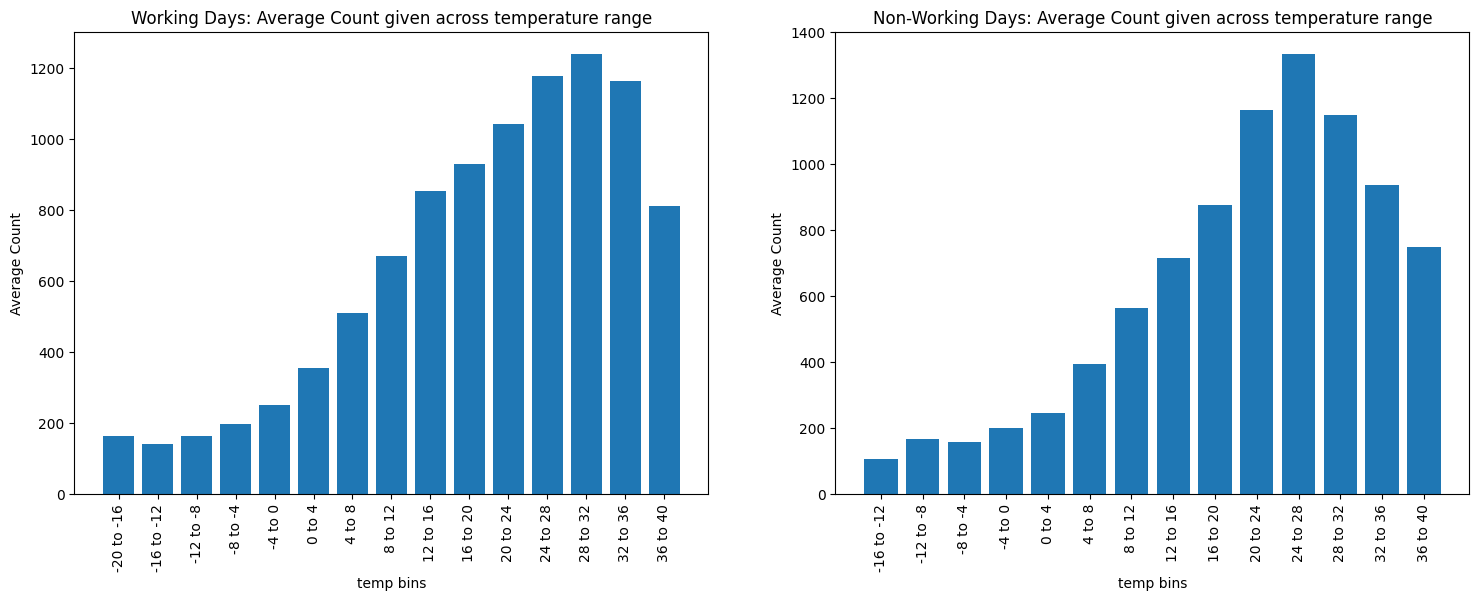

In [23]:
functioning_days_w = functioning_days[functioning_days.Working==1]
functioning_days_nw = functioning_days[functioning_days.Working==0]

bin_size = 4
functioning_days_w['temp_round'] = functioning_days_w['Temperature(C)']//bin_size
functioning_days_nw['temp_round'] = functioning_days_nw['Temperature(C)']//bin_size

minrounds_w = int(functioning_days_w['temp_round'].min())
minrounds_nw = int(functioning_days_nw['temp_round'].min())

maxrounds_w = int(functioning_days_w['temp_round'].max())+1
maxrounds_nw = int(functioning_days_nw['temp_round'].max())+1


mean_count_vs_temp_w = functioning_days_w.groupby('temp_round')['E-scooter Count'].mean()
mean_count_vs_temp_nw = functioning_days_nw.groupby('temp_round')['E-scooter Count'].mean()
idx_w, idx_nw = range(len(mean_count_vs_temp_w)), range(len(mean_count_vs_temp_nw))
labels_w = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(minrounds_w,maxrounds_w)]
labels_nw = [str(bin_size*i)+' to '+str(bin_size*(i+1)) for i in range(minrounds_nw,maxrounds_nw)]

fig = plt.figure(figsize=(18, 6))
axes = fig.add_subplot(1, 2, 1)
plt.bar(x=idx_w, height=mean_count_vs_temp_w)
plt.xticks(idx_w, labels_w, rotation=90)
plt.xlabel('temp bins')
plt.ylabel('Average Count')
plt.title('Working Days: Average Count given across temperature range')

axes = fig.add_subplot(1, 2, 2)
plt.bar(x=idx_nw, height=mean_count_vs_temp_nw)
plt.xticks(idx_nw, labels_nw, rotation=90)
plt.xlabel('temp bins')
plt.ylabel('Average Count')
plt.title('Non-Working Days: Average Count given across temperature range')

plt.show()

Oberservation:
- The number of e-scooters always peeks arround 24 to 28 degrees for both working and non working days with an average of arround (1200-1300)
- For Working days the number e scooter rises with the temperatures but starts deeping down from temperatures greater than 28 c (this decrease is not very severe until we reach 36 c )
- For non working days people seem to like using scooters also arround the 24 to 28 C  but they are less likely to tolerate higher temperatures than during working days

**1- Temperature**:<br>
let's assume that the weather is good when it's between 8 and 36  otherwise it's bad 

In [24]:
functioning_days["WeatherType"] = functioning_days["Temperature(C)"].map(lambda x : x > 8 and x<36  ).astype('int')


Text(0.5, 1.0, 'Good weather')

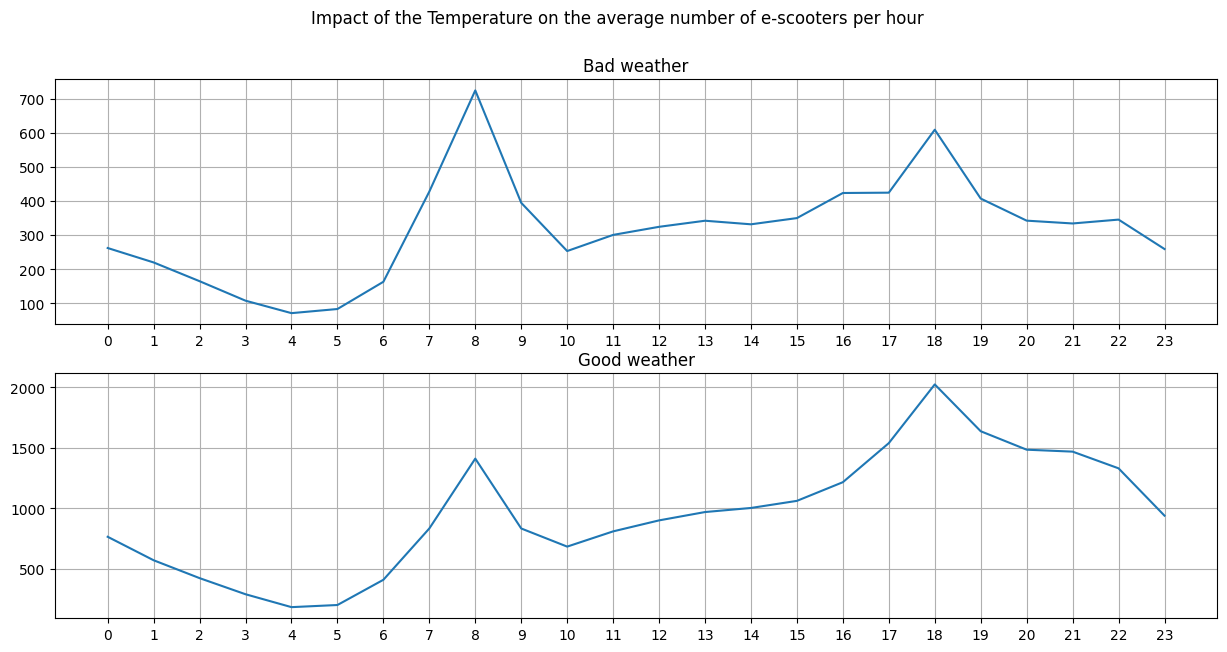

In [25]:
fig, axs = plt.subplots(2,figsize=(15,7))
fig.suptitle('Impact of the Temperature on the average number of e-scooters per hour')

axs[0].set_xticks([i for i in range(24)]) 
axs[1].set_xticks([i for i in range(24)]) 

badWeather = functioning_days[functioning_days['WeatherType']==0]

axs[0].plot([i for i in range(24)],badWeather.groupby(["Hour"]).mean()["E-scooter Count"])
axs[0].grid(True)
axs[0].set_title("Bad weather")


goodWeather =functioning_days[functioning_days['WeatherType']==1]

axs[1].plot([i for i in range(24)],goodWeather.groupby(["Hour"]).mean()["E-scooter Count"])
axs[1].grid(True)
axs[1].set_title("Good weather")


- People will use scooters during rush hours like expected however two pattern are observed

- The number of people using scooters in general is much lower than during good weather
- During the night (from 17 to 18) people are very likely to not use scooters if the weather is bad while the opposite is true
- if it's bad weather people will use the scooter in the morning less than the later hours of thday , this is exactly the inverse if the weather is good

Question : What is the impact of weekends/ holidays on the E - scooter count?

[Text(0.5, 0, 'Hour in the day'),
 Text(0, 0.5, 'E-scooter Count'),
 Text(0.5, 1.0, 'Average E-Scooter usage during Weekdays')]

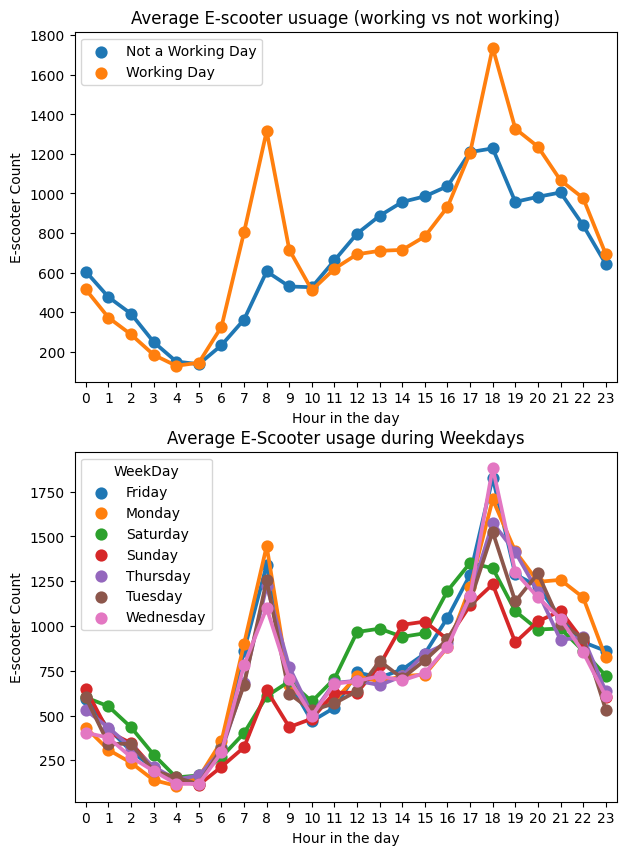

In [26]:

f, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 10))

group_work_hour = pd.DataFrame(functioning_days.groupby(['Working', 'Hour'])['E-scooter Count'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='Hour', y='E-scooter Count', hue='Working', ax=axes[0])
handles, _ = axes[0].get_legend_handles_labels()

axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set(xlabel='Hour in the day', ylabel='E-scooter Count', title='Average E-scooter usuage (working vs not working)')

hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
group_day_hour = pd.DataFrame(functioning_days.groupby(['WeekDay', 'Hour'])['E-scooter Count'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='Hour', y='E-scooter Count', hue='WeekDay', ax=axes[1])
axes[1].set(xlabel='Hour in the day', ylabel='E-scooter Count', title='Average E-Scooter usage during Weekdays')


We can observe 2 trends One for the workdays and one for the non workdays:<br>
1- If it's a working day : People use e-scooters primary during the rush hours (getting to work or comming home from work) <br>
2- If it's not a working day , people are less likely to use scooters in general, hoever the number of e-scooters grows starting from 6 and continue to grow throughout the day until 18 <br>
3- after 20 pm the same behavior is observed wether it's a holiday or not

In [27]:
np.corrcoef(functioning_days["Working"], functioning_days["E-scooter Count"])[0][1]

0.0435576722553006

The corrolation suggestes that's the effect of working day or not, is insignificiant on the e scouter

In [28]:
functioning_days["Seasons"] = functioning_days["Seasons"].map(lambda x: ["Winter","Spring","Summer","Autumn"].index(x))


In [29]:
#create dummy variables for categorical variables : seasons
seasons_dummies = pd.get_dummies(functioning_days['Seasons'], prefix='Seasons')
seasons_dummies.columns = ['Winter', 'Spring', 'Summer', 'Autumn']
functioning_days = pd.concat([functioning_days, seasons_dummies], axis=1)

In [30]:
def draw_corr_matrix(df):
  plt.figure(figsize=(20,20))
  corr_matrix = df.corr()
  sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
  plt.show()

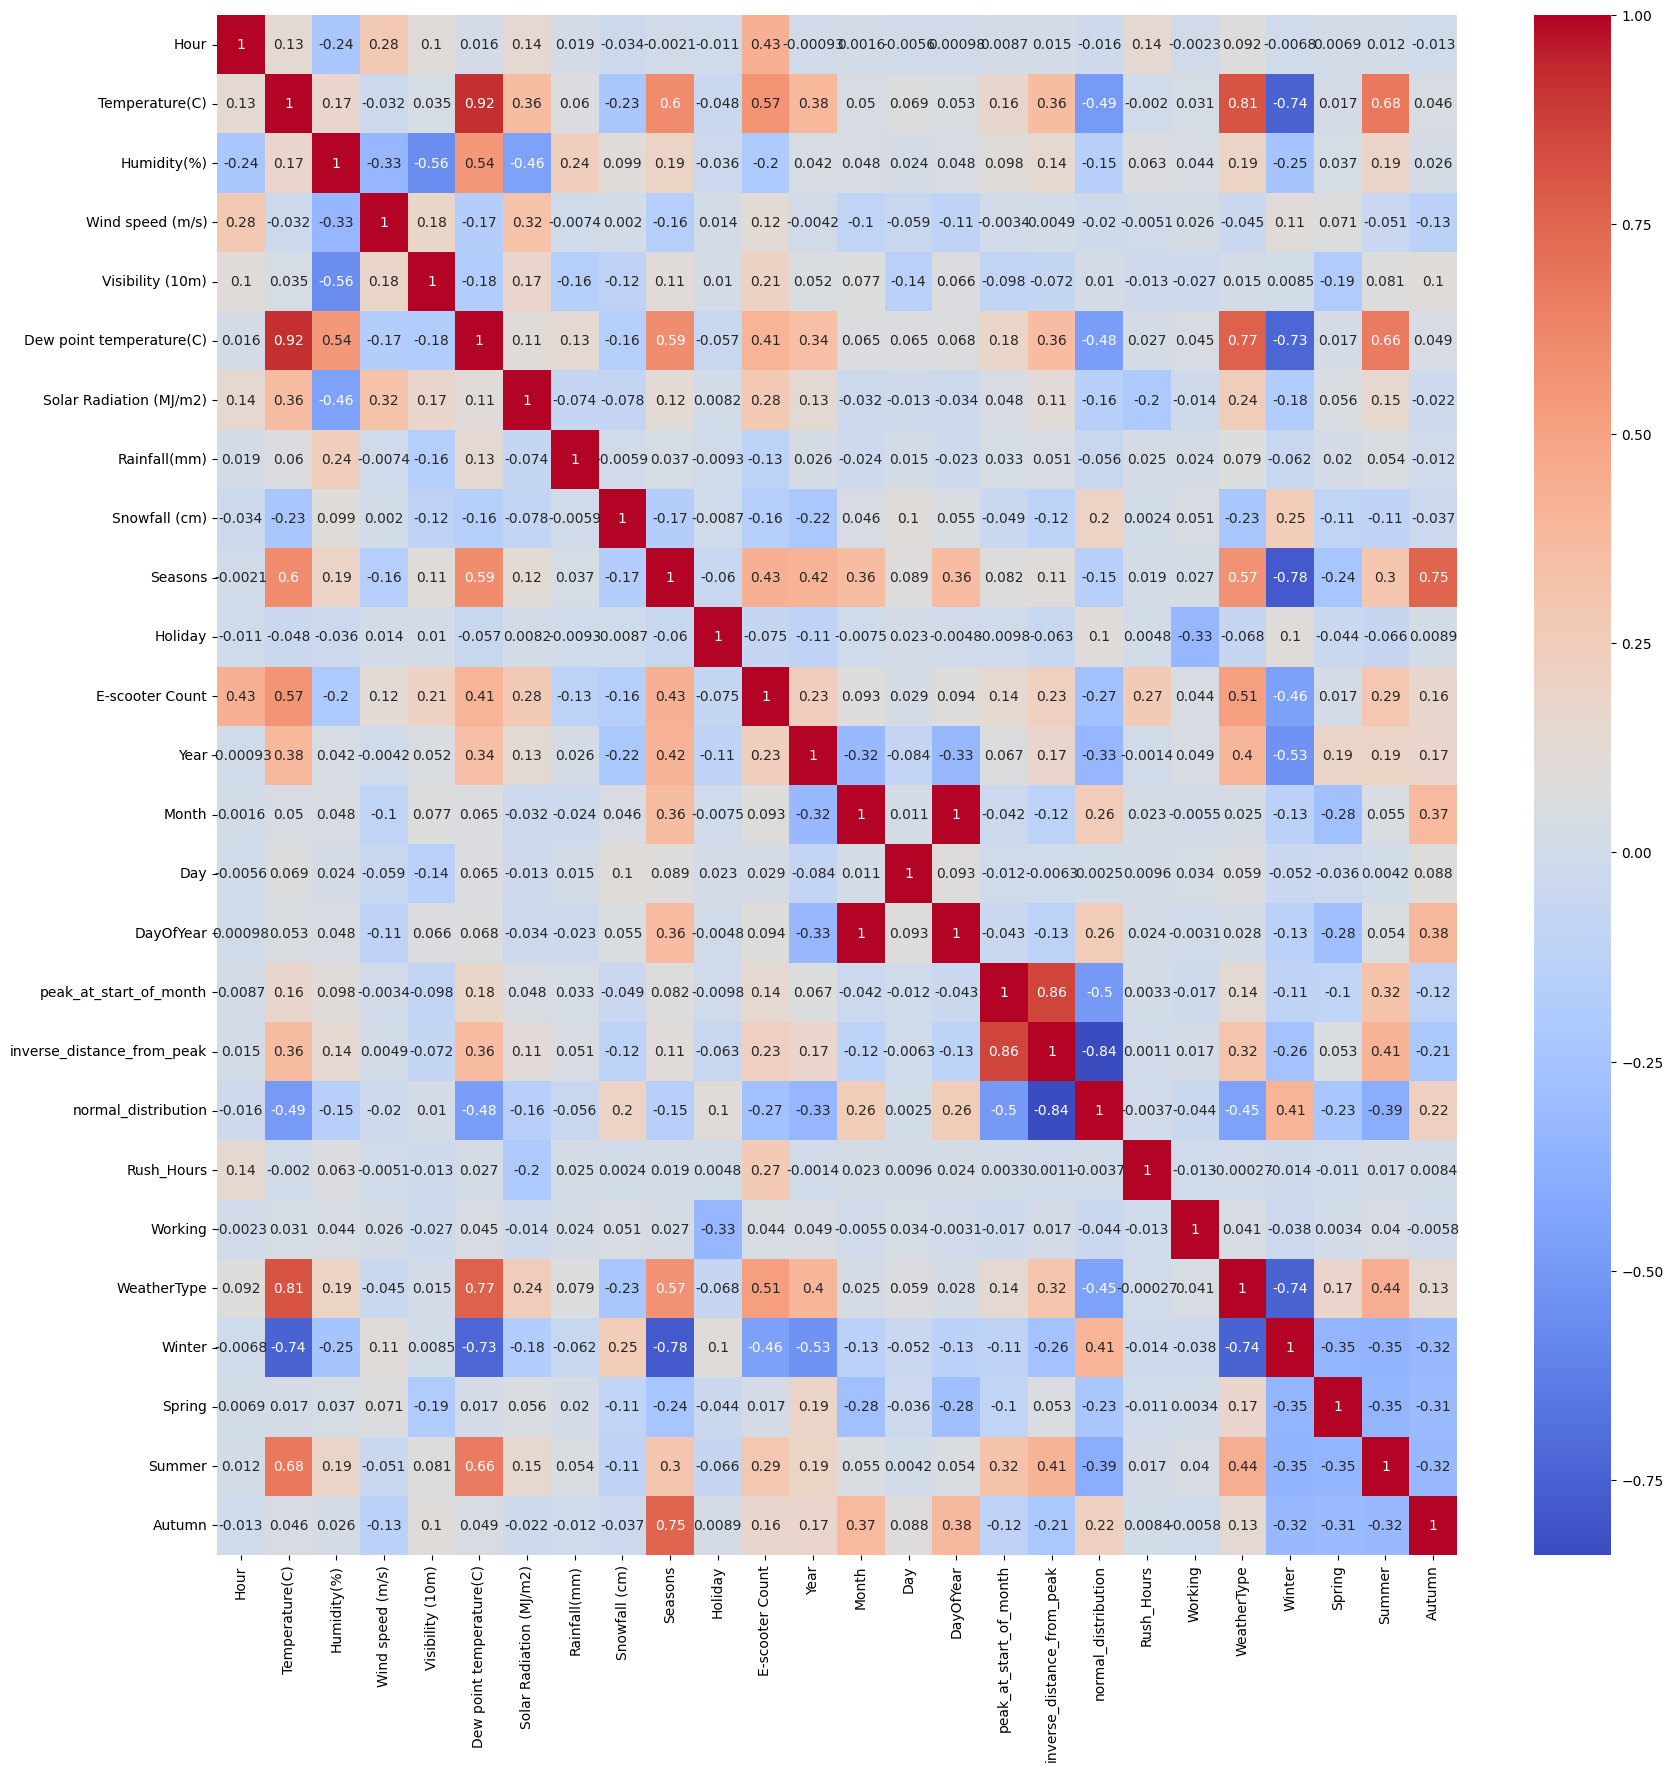

In [31]:
draw_corr_matrix(functioning_days)

<AxesSubplot: title={'center': 'Correlation between the variables and the E-scooter Count'}>

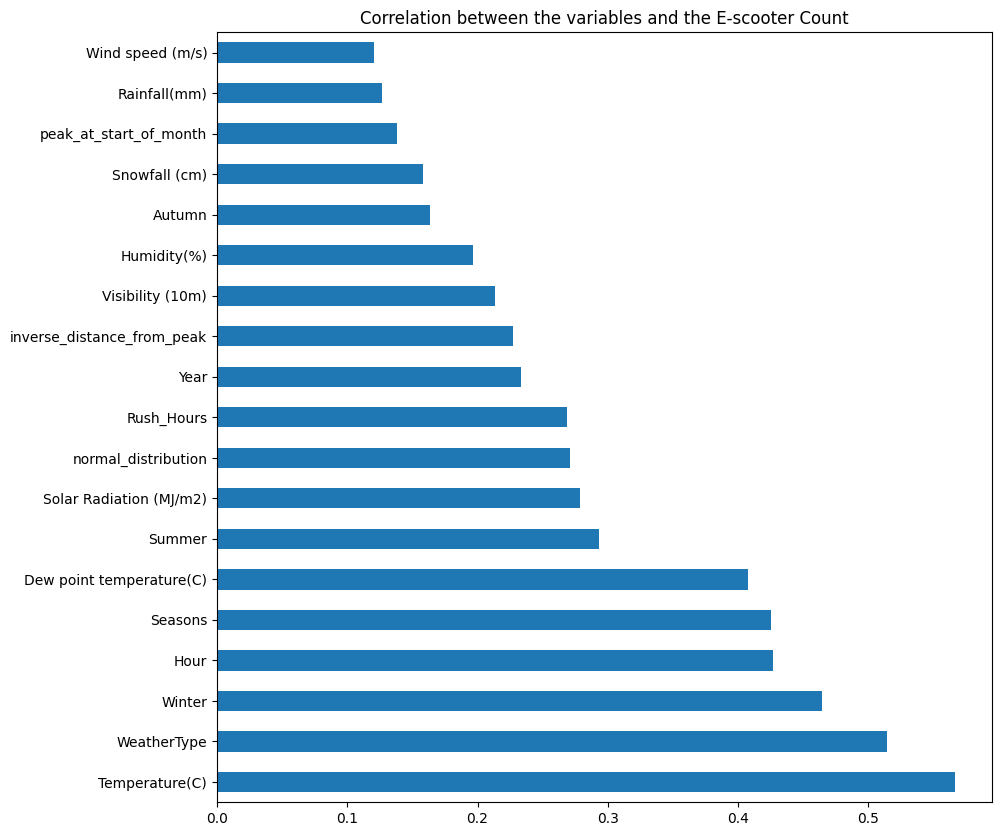

In [32]:
#show the correlation between the variables and the target variable and plot it in a bar chart
plt.figure(figsize=(10,10))
plt.title("Correlation between the variables and the E-scooter Count")
corr = functioning_days.corr()
corr_target = abs(corr["E-scooter Count"])
relevant_features = corr_target[corr_target>0.1]
relevant_features.sort_values(ascending=False, inplace=True)
relevant_features.drop("E-scooter Count", inplace=True)
relevant_features.plot(kind="barh")


## Conclusion : <br>
- Throughout this section we were able to create new features that can capture the different patterns that are observed in the data, in terms of seasonality and logical assumptions about the data <br>
- Thanks to the correlation matrix we can decide which features should be used to train the models and which should be discarded.
- This is will be a first step of reducing the dimention space of the features to only significant ones.

# Feature Extraction

In [33]:
def normal_dist(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

In [121]:
def preprocess(dataset,test=False,test_split_percent=0.8):
  
  # feature engineering
  df = dataset.copy()
  df['old_index'] = df.index
  df_non_functioning = df[df['Functioning Day']=='No']
  df = df[dataset['Functioning Day']=='Yes']
  #convert date to datetime of the format YYYY-MM-DD
  df['Date'] = pd.to_datetime(df['Date'])
  df['Year'] = pd.DatetimeIndex(df['Date']).year
  df['Month'] = pd.DatetimeIndex(df['Date']).month
  df['Day'] = pd.DatetimeIndex(df['Date']).day
  df = df.sort_values(by=['Year','Month','Date','Hour'])
  #add feature number of days in the year (0-365)
  df['DayOfYear'] = df['Date'].dt.dayofyear

  # Create a new column to indicate whether the day is at the start of the month
  df['start_of_month'] = df['Date'].dt.day == 1

  # Create a new column to indicate whether the month is April, June, July, or September
  df['non_peak_months'] = df['Date'].dt.month.isin([4, 6, 7, 9])

  # Create a new column to indicate the peak of the month
  df['peak_of_month'] = (~df['non_peak_months']) & df['start_of_month']

  # Drop unnecessary columns
  df.drop(['start_of_month', 'non_peak_months'], axis=1, inplace=True)
 
  df_monthly = df.groupby(df["Date"].dt.month).mean()

  # Create a new column to indicate the month of the year
  df_monthly['month'] = df_monthly.index

  # Create a new column to indicate the peak month (6th month)
  df_monthly['peak_at_start_of_month'] = df_monthly['month'] == 6

  # Create a new column to indicate the distance from the peak month
  df_monthly['distance_from_peak'] = abs(df_monthly['month'] - 6)

  # Create a new column to indicate the inverse distance from the peak month
  df_monthly['inverse_distance_from_peak'] = 1 / (df_monthly['distance_from_peak'] + 1)


  df_monthly['normal_distribution'] = normal_dist(df_monthly['distance_from_peak'], mean_of_population, std_of_propulation)

  # Drop unnecessary columns
  df_monthly.drop(['month','distance_from_peak'], axis=1, inplace=True)

  merged_df = pd.merge(df, df_monthly[["peak_at_start_of_month","inverse_distance_from_peak","normal_distribution","Month"]], left_on='Month', right_on='Month', how='left')

  merged_df["WeatherType"] = merged_df["Temperature(C)"].map(lambda x : x > 8 and x<36  ).astype('int')



  merged_df["Seasons"] = merged_df["Seasons"].map(lambda x: ["Winter","Spring","Summer","Autumn"].index(x))
  seasons_dummies = pd.get_dummies(merged_df['Seasons'], prefix='Seasons')
  seasons_dummies.columns = ['Winter', 'Spring', 'Summer', 'Autumn']
  merged_df = pd.concat([merged_df, seasons_dummies], axis=1)
  merged_df["Rush_Hours"] = merged_df["Hour"].apply(lambda hour:1 if (hour in range(6,10) or hour in range(17,21)) else 0 )

  # merge merged_df with df_non_functioning
  merged_df = pd.concat([merged_df,df_non_functioning],axis=0)
  merged_df = merged_df.sort_values(by=['Year','Month','Date','Hour'])

  merged_df["peak_at_start_of_month"] = merged_df["peak_at_start_of_month"].astype('float')
  if ( not test):
    # since the distribution is skewed, we will use the log of the target variable
    merged_df["E-scooter Count"] = np.log1p(merged_df["E-scooter Count"])


  # features selection
  features = ['Temperature(C)', 'WeatherType', 'Winter', 'Hour',
       'Dew point temperature(C)', 'Summer', 'Solar Radiation (MJ/m2)',
       'Rush_Hours', 'Year', 'inverse_distance_from_peak',
       'normal_distribution', 'Visibility (10m)', 'Humidity(%)', 'Autumn',
       'Snowfall (cm)', 'peak_at_start_of_month', 'Rainfall(mm)',
       'Wind speed (m/s)','Functioning Day', 'E-scooter Count','old_index']

  if (test):
    features.remove('E-scooter Count')
    merged_df["Year"] = pd.DatetimeIndex(merged_df['Date']).year
    merged_df['Month'] = pd.DatetimeIndex(merged_df['Date']).month
    merged_df = merged_df.sort_values(by=['Year','Month','Date','Hour'])

  #merged_df['old_index'] = merged_df.index
  #features.append('old_index')
  splitindex = int(df.shape[0]*test_split_percent)
  #return train and validation set
  if (test):
    return merged_df[features]
  return merged_df[features][0:splitindex],merged_df[features][splitindex:]

# Data preparation

In this section i will proceed by following these steps : <br>
- First we would use the preprocess the datasets using the previous method that we created. (that method will return the train set and validation set with the feature engineering done)
- We will then create a new method called split_functioning_days which transforms each preprocessed dataframe into 2 : functioning days or non-functionning days . It's useless to train our models on the non-functioning days since we already know the answer.
- we will create another method called merge_functioning_days which will merge back the two datasets.

In [35]:
#split data into two datasets based on the functioning day
def split_functioning_days(df):
  df_copy = df.copy()
  return df_copy[df_copy['Functioning Day'] == 'Yes'],df_copy[df_copy['Functioning Day'] == 'No']

#merge the two datasets
def merge_functioning_days(functioning_days,non_functioning_days):
    return pd.concat([functioning_days,non_functioning_days],axis=0).sort_values(by='old_index').drop('old_index',axis=1)


In [36]:
#split based on the functioning day
preprocessed_data_train,preprocessed_data_validation = preprocess(train_data)
functioning_days_train,non_functioning_days_train = split_functioning_days(preprocessed_data_train)
functioning_days_validation,non_functioning_days_validation = split_functioning_days(preprocessed_data_validation)




In [37]:
X_TRAIN = functioning_days_train.drop(axis=0,columns=["E-scooter Count",'Functioning Day','old_index'])
Y_TRAIN = functioning_days_train["E-scooter Count"]

X_VALIDATION = functioning_days_validation.drop(axis=0,columns=["E-scooter Count",'Functioning Day','old_index'])
Y_VALIDATION = functioning_days_validation["E-scooter Count"]


## Checking the feature importance according to Random Forest regressor to get an indea 

Temperature(C): 0.357988293574491
Hour: 0.2242216051256471
Rainfall(mm): 0.19368922510694364
Humidity(%): 0.08393238555845808
Dew point temperature(C): 0.027690148757419042
Visibility (10m): 0.024019268841622504
Wind speed (m/s): 0.018877600353489024
Solar Radiation (MJ/m2): 0.016689798299002995
Winter: 0.013618597032131
inverse_distance_from_peak: 0.009271058780448177
normal_distribution: 0.00897053633241212
Rush_Hours: 0.008362465237061223
Year: 0.003852104763001609
Autumn: 0.002830334095562444
Summer: 0.002606626304319057
Snowfall (cm): 0.0022609066381189414
peak_at_start_of_month: 0.0007298495484948752
WeatherType: 0.00038919565137707446


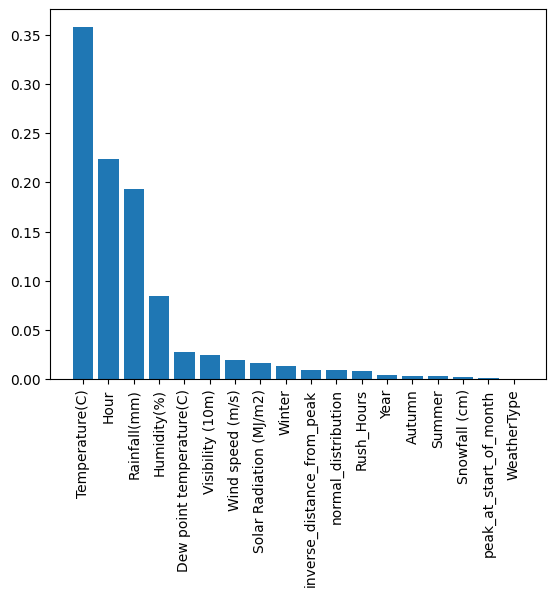

In [38]:
from sklearn.inspection import permutation_importance


x_train, x_test, y_train, y_test = train_test_split(X_TRAIN,Y_TRAIN,shuffle=False)

model = RandomForestRegressor()
model.fit(X_TRAIN, Y_TRAIN)

# Calculate the permutation importance of each feature
result = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=0)

# Sort the features by their permutation importance
fi = sorted(zip(model.feature_importances_, X_TRAIN.columns), reverse=True)

# Print the permutation importance of each feature
for feature in fi:
    print(f"{feature[1]}: {feature[0]}")

# Plot the feature importance
features = [x[1] for x in fi]
importance = [x[0] for x in fi]
plt.bar(np.arange(len(features)), importance)
plt.xticks(np.arange(len(features)), features)
plt.xticks(rotation=90)
plt.show()

##### we can see that according to RF regressor some of the features were extremely important such as : <br>
##### - The Temperature : which makes sense since it is intuatively the first thing you think about when considering riding an electric scooter
##### - The Hour : which is expected since we noticed that there were some very strong patterns related to specific hours

##### Interrestingly we also have some features which were corrolated with the e-scouuter count but were never used to make the final prediction: 
##### - This could be before of the corrolation among the features that were already used and the features that weren't 

#### Ultimeratly it's not a big issue since i will be using different types of models which will definently use different features so when we combine them using an ensemble method, the results will surely improve as it's taking into consideration different portions from the feature space.

In [39]:
scaler = StandardScaler()
scaler = scaler.fit(X_TRAIN)
X_TRAIN = scaler.transform(X_TRAIN)
X_VALIDATION = scaler.transform(X_VALIDATION)

scaling the training data and using the same scaller for the validation data to maintain a commun scale when training and testing

# Modeling

### In this section i will be working on implementing multiple state of the art algorithm on my dataset and deciding which ones do the best results.
### then i will be performing hyper-parameter tuning on the best ones,
### which will be then combined using a stacking method to get the most out of them and improve the predictions as much as possible

* First i will be using an library called LazyRegressor which bascially offers to train and test multiple machine learning algorithms at the same time, then display then results in a table

In [227]:
#split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_TRAIN, Y_TRAIN, test_size=0.25, random_state=42)
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models_scaled, predictions = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [07:35<00:00, 10.85s/it]


In [228]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.87,0.87,0.41,1.06
LGBMRegressor,0.86,0.87,0.42,0.16
RandomForestRegressor,0.86,0.87,0.42,2.14
HistGradientBoostingRegressor,0.86,0.87,0.42,1.27
XGBRegressor,0.85,0.85,0.45,0.21
BaggingRegressor,0.85,0.85,0.45,0.24
GradientBoostingRegressor,0.85,0.85,0.45,0.59
SVR,0.81,0.81,0.50,0.62
NuSVR,0.81,0.81,0.50,0.50


##### Althrough all of these more are (Out of the box) and not tuned, we can already observe signs of good results.
##### We can also see that there are some models that perform really well such as : LGBMRegressor , HistGradientBoostingRegressor , XGBRegressor , ExtraTreesRegressor	and the RandomForestRegressor.

## Exploring using a standard neural network for this task

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
121/121 [==============================] - ETA: 0s - loss: 21.4659 - mae: 4.1389WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000017B2891A710> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
121/121 [==============================] - 1s 3ms/step - loss: 21.4659 - mae: 4.1389 - val_loss: 4.5198 - val_mae: 1.8441
Epoch 2/1000
121/121 [==============================] - 0s 2ms/step - loss: 9.0004 - mae: 2.3248 - val_loss: 2.4922 - val_mae: 1.2782
Epoch 3/1000
121/121 [==============================] - 0s 2ms/step - loss: 6.4858 - mae: 1.9703 - val_loss: 1.9660 - val_mae: 1.0910
Epoch 4/1000
121/121 [==============================] - 0s 2ms/step - loss: 5.1629 - mae: 1.7820 - val_loss: 1.7533 - val_mae: 1.0284
Epoch 5/1000
121/121 [==============================] - 0s 2ms/step - loss: 4.7856 - mae: 1.6901 - val_loss: 1.7148 - val_mae: 1.0534
Epoch 6/1000
121/121 [=================

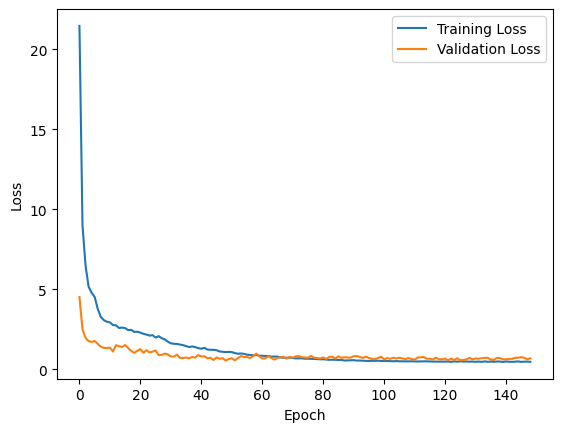

In [40]:
import tensorflow as tf

# Define the input and output layers
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(32, input_shape=(18,), activation="relu",kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(8, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(1))
# Create the model
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

validation_set = (X_VALIDATION, Y_VALIDATION)

# Train the model
history = model.fit(X_TRAIN, Y_TRAIN, epochs=1000, batch_size=32, validation_data=validation_set,callbacks=[callback])

# Extract the validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### We have acheived a very good fit using neural networks :
##### - The plot of training loss decreases to a point of stability.
##### - The plot of validation loss decreases to a point of stability and has a small gap with the training loss.
##### Conclusion : this model is stable and doesn't overfit. 
##### However it sadly doesn't offer satisfactory results since the mae values is always arround 0.9 and other machine learning models were doing a better job.
##### The potential causes of this behaviour : is the fact that vanilla neural networks can't capture the time dependency which is crutial in our case since we are essentially trying to solve a forcasting problem on timeseries.
##### We could use an LSTM instead or stick to traditional ML methods (espicially since our dataset is not very big in terms of size)

In [41]:
preprocessed_test_data = preprocess(test_data,True)
functioning_days_test,non_functioning_days_test = split_functioning_days(preprocessed_test_data)
X_TEST = functioning_days_test.drop(['Functioning Day','old_index'],axis=1)


# Perform Hyper parameter tuning


For hyper parameter tuning i will be using RandomizedSearchCV since usually its performance isn't very far off from gridsearchcv but it's much much faster.

### Random Forrest Regressor

In [433]:
# train the model using random forest regressor
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
model.fit(X_TRAIN, Y_TRAIN)


RandomForestRegressor(max_depth=10, random_state=0)

In [434]:

#hyperparameter tuning of the model
def hyperparameter_tuning(X_TRAIN,Y_TRAIN):
    param_grid = {
        "bootstrap": [True, False],
        'max_depth': [3,5,10,12,15,20],
        "max_features":[3,4 ,5,10,'auto','sqrt','log2'],
        "min_samples_leaf": [3,5, 10],
        "min_samples_split": [3,5,7,10,20],
        "n_estimators": [50, 100,200,500,700,1000]
    }
    # Create a based model
    rf = RandomForestRegressor()
    # Instantiate the grid search model
    grid_search = RandomizedSearchCV(estimator = rf, param_distributions= param_grid, 
                              cv = 10, n_jobs = -1, verbose = 2,scoring='neg_mean_squared_error')
    grid_search.fit(X_TRAIN, Y_TRAIN)
    return grid_search.best_estimator_

In [435]:
preprocessed_hyper_data,_ = preprocess(train_data,False,100)
functioning_days_hyper,non_functioning_days_hyper = split_functioning_days(preprocessed_hyper_data)
X_HYPER = functioning_days_hyper.drop(['E-scooter Count','Functioning Day','old_index'],axis=1)
Y_HYPER = functioning_days_hyper["E-scooter Count"]
scaler = StandardScaler()
scaler = scaler.fit(X_HYPER)
X_HYPER = scaler.transform(X_HYPER)

best_model = hyperparameter_tuning(X_HYPER,Y_HYPER)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [436]:
best_model

RandomForestRegressor(max_depth=12, max_features=10, min_samples_leaf=3,
                      min_samples_split=7, n_estimators=50)

In [44]:
best_model = RandomForestRegressor(max_depth=12, max_features=10, min_samples_leaf=3,
                      min_samples_split=7, n_estimators=50)
best_model.fit(X_HYPER,Y_HYPER)


RandomForestRegressor(max_depth=12, max_features=10, min_samples_leaf=3,
                      min_samples_split=7, n_estimators=50)

In [45]:
# calculate the mean absolute error of the model on the validation set
y_pred = best_model.predict(X_HYPER)
mae = mean_absolute_error(Y_HYPER, y_pred)
mae_ad = mean_absolute_error(np.exp(Y_HYPER)-1, np.exp(y_pred)-1)

print("MAE: ",mae)
print("MAE: ",mae_ad)


MAE:  0.19563402503824293
MAE:  113.99984257683626


We successfully tuned the Random forrest classifier

In [73]:
# this function is used to predict the number of scooters for the test data
# it takes the model and the scaler as input and returns the predictions
# it preprocesses the data and then scales it
# it then splits the data into functioning and non functioning days
# it then predicts the number of scooters for the functioning days and sets the number of scooters for the non functioning days to 0
# it then merges the functioning and non functioning days and returns the predictions
# it also converts the predictions to the original scale
def model_predict(model,scaler,test_data):
  preprocessed_data = preprocess(test_data,test=True)
  # scale the data
  functioning_days_test,non_functioning_days_test = split_functioning_days(preprocessed_data)
  x_test = functioning_days_test.drop(axis=0,columns=['old_index','Functioning Day'])
  x_test = scaler.transform(x_test)
  functioning_days_test['preds'] = np.exp(model.predict(x_test))-1
  non_functioning_days_test['preds'] = 0
  return merge_functioning_days(functioning_days_test,non_functioning_days_test)["preds"]

In [97]:
# this function is used to save the predictions to a csv file
# it takes the predictions and the name of the file as input
# it then creates a dataframe with the predictions and the ids
# it then saves the dataframe to a csv file

def save_submition(preds,name):
  headerList = ["Id","Predicted"]
  id = [int(i) for i in range(len(preds))]


  result = pd.DataFrame([id,preds])
  result = result.T
  result.iloc[:, 0] = result.iloc[:, 0].astype('int')
  # converting data frame to csv
  result.to_csv(f"submissions/{name}.csv", header=headerList, index=False)

# XGBOOST

##### Perfroming Hyper-parameter tuning the same way as the Random forrest Regressor

In [52]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    'max_depth': np.linspace(3, 20, 20, endpoint=True,dtype=int),  # maximum depth of the decision tree
    'learning_rate':  np.linspace(0.01, 0.35,30,endpoint=True,dtype=float),  # learning rate for the gradient boosting algorithm
    'n_estimators':  np.linspace(50, 1500, 20, endpoint=True,dtype=int),  # number of trees in the model
    'subsample': [0.6, 0.8, 1.0],  # fraction of observations to use for training each tree
    'colsample_bytree': [0.6, 0.8, 1.0]  # fraction of features to use for training each tree
}


def train_and_tune_xgb(X, y, param_grid, cv=10, scoring='neg_mean_squared_error'):
    model = XGBRegressor()
    grid_search = RandomizedSearchCV(model, param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X, y)
    model = grid_search.best_estimator_
    return model

best_model_xgb = train_and_tune_xgb(X_HYPER,Y_HYPER,xgb_param_grid)

In [53]:
best_model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.08034482758620688,
             max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=17, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=736, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [54]:
# calculate the mean absolute error of the model on the validation set
y_pred = best_model_xgb.predict(X_HYPER)
mae = mean_absolute_error(Y_HYPER, y_pred)
mae_ad = mean_absolute_error(np.exp(Y_HYPER)-1, np.exp(y_pred)-1)

print("MAE: ",mae)
print("MAE: ",mae_ad)


MAE:  0.0005108069555874085
MAE:  0.37866930686111705


XGBoost Model is performing extremely well after tuning

## HistGradientBoostingRegressor

In [55]:
hgb_param_grid = {
    'max_depth': [3, 5, 7,10,15,20,25],  # maximum depth of the decision tree
    'learning_rate': np.linspace(0.01, 0.35,30,endpoint=True,dtype=float),  # learning rate for the gradient boosting algorithm
    'l2_regularization': np.linspace(0.01, 0.35,30,endpoint=True,dtype=float),  # L2 regularization term
    'max_bins': [32, 64, 128,255],  # maximum number of bins to use for discretization
    'max_leaf_nodes': [16, 32, 64],  # maximum number of leaf nodes in each tree,
    'max_iter' : [100,200,300,400,500,600,700,800,900,1000]
    
}

def train_and_tune_hgb(X, y, param_grid, cv=10, scoring='neg_mean_squared_error'):
    model = HistGradientBoostingRegressor()
    grid_search = RandomizedSearchCV(model, param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X, y)
    model = grid_search.best_estimator_
    return model

best_model_hgb = train_and_tune_hgb(X_HYPER,Y_HYPER,hgb_param_grid)

In [56]:
best_model_hgb

HistGradientBoostingRegressor(l2_regularization=0.12724137931034482,
                              learning_rate=0.08034482758620688, max_depth=5,
                              max_iter=300, max_leaf_nodes=64)

In [66]:

# calculate the mean absolute error of the model on the validation set
y_pred = best_model_hgb.predict(X_HYPER)
mae = mean_absolute_error(Y_HYPER, y_pred)
mae_ad = mean_absolute_error(np.exp(Y_HYPER)-1, np.exp(y_pred)-1)

print("MAE: ",mae)
print("MAE: ",mae_ad)


MAE:  0.19802873514058014
MAE:  116.707332754157


## ExtraTreesRegressor

In [62]:
etr_param_grid = {
    'n_estimators':  np.linspace(50, 1500, 20, endpoint=True,dtype=int),  # number of trees in the model
    'max_depth': np.linspace(3, 20, 20, endpoint=True,dtype=int),  # maximum depth of the decision tree
    'max_features': ['auto', 'sqrt', 'log2'],  # number of features to consider when looking for the best split
    'bootstrap' : [True,False],
    'warm_start' : [True,False],
}


def train_and_tune_etr(X, y, param_grid, cv=10, scoring='neg_mean_squared_error'):
    model = ExtraTreesRegressor()
    grid_search = RandomizedSearchCV(model, param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X, y)
    model = grid_search.best_estimator_
    return model

best_model_etr = train_and_tune_etr(X_HYPER,Y_HYPER,etr_param_grid)

In [63]:
best_model_etr

ExtraTreesRegressor(bootstrap=True, max_depth=19, max_features='auto',
                    n_estimators=278, warm_start=True)

In [65]:

# calculate the mean absolute error of the model on the validation set
y_pred = best_model_etr.predict(X_HYPER)
mae = mean_absolute_error(Y_HYPER, y_pred)
mae_ad = mean_absolute_error(np.exp(Y_HYPER)-1, np.exp(y_pred)-1)

print("MAE: ",mae)
print("MAE: ",mae_ad)


MAE:  0.10358717926891309
MAE:  58.98591275962453


## LGBMRegressor

In [517]:
lgbmr_param_grid = {
    'n_estimators': np.linspace(50, 2000, 30, endpoint=True,dtype=int),  # number of trees in the model
    'max_depth': np.linspace(3, 20, 20, endpoint=True,dtype=int),
    'learning_rate':  np.linspace(0.01, 0.35,30,endpoint=True,dtype=float),  # learning rate for the gradient boosting algorithm
    'num_leaves': [10,20,30,40, 50, 70,100],  # number of leaves in each tree
    'min_child_samples': [5,7,9, 10, 15],  # minimum number of samples in each child
    'subsample': [0.4,0.6,0.8, 1.0],  # fraction of data to use for training each tree
    'colsample_bytree': [0.2,0.4,0.6,0.8, 1.0]  # fraction of features to use for training each tree
}

def train_and_tune_lgbmr(X, y, param_grid, cv=5, scoring='neg_mean_squared_error'):
    model = ltb.LGBMRegressor()
    grid_search = RandomizedSearchCV(model, param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X, y)
    model = grid_search.best_estimator_
    return model

best_model_lgbmr = train_and_tune_lgbmr(X_HYPER,Y_HYPER,lgbmr_param_grid)

In [70]:
best_model_lgbmr 

LGBMRegressor(colsample_bytree=0.6, learning_rate=0.033448275862068964,
              max_depth=11, min_child_samples=15, n_estimators=1529,
              num_leaves=50)

In [71]:

# calculate the mean absolute error of the model on the validation set
y_pred = best_model_lgbmr.predict(X_HYPER)
mae = mean_absolute_error(Y_HYPER, y_pred)
mae_ad = mean_absolute_error(np.exp(Y_HYPER)-1, np.exp(y_pred)-1)

print("MAE: ",mae)
print("MAE: ",mae_ad)


MAE:  0.07070887398792743
MAE:  45.84969102172515


# Combining all the models using a stacking method:
##### Stacking methods generally achieve similar or better results than any individual particular model. The reason for this choise is because i wanted to take advantage of the models diversity which take advantage of multiple aspects of the data to perform their individual predictions.

## performing hyperparameter tuning on the meta model (mlp regressor)

In [85]:
models_dict = {'XGBRegressor': best_model_xgb,'HistGradientBoostingRegressor': best_model_hgb,'RandomForestRegressor': best_model,'ExtraTreesRegressor': best_model_etr,'LGBMRegressor': best_model_lgbmr}


columns = list(models_dict.keys())
df_stacking = pd.DataFrame(columns=columns)
for model in columns:
    df_stacking[model] = model_predict(models_dict[model],scaler,train_data)

#discard old index
df_stacking.reset_index(drop=True, inplace=True)

df_stacking['Actual'] = train_data['E-scooter Count']

df_stacking


,XGBRegressor,HistGradientBoostingRegressor,RandomForestRegressor,ExtraTreesRegressor,LGBMRegressor,Actual
0,1159.32,1230.81,1221.15,1195.19,1197.67,1160
1,97.99,92.45,93.02,99.20,92.28,98
2,1770.26,1639.01,1698.53,1741.66,1564.74,1772
3,906.07,945.37,909.60,893.21,912.52,906
4,74.11,117.76,131.77,108.53,100.90,74
...,...,...,...,...,...,...
4995,794.63,919.34,949.45,819.63,810.08,795
4996,207.07,314.04,271.95,236.22,227.16,207
4997,886.23,927.16,892.31,894.14,880.29,886
4998,54.98,54.87,56.36,55.26,50.10,55


In [146]:
#import MLPRegressor
from sklearn.neural_network import MLPRegressor

param_grid = {'hidden_layer_sizes': [(10,), (50,), (100,)],
              'alpha': np.linspace(0.01, 0.35,30,endpoint=True,dtype=float),
              'learning_rate_init': np.linspace(0.01, 0.35,30,endpoint=True,dtype=float)}

def hyperparameter_tuning_meta_learner(X, y, param_grid, cv=10, scoring='neg_mean_squared_error'):

    model = MLPRegressor()
    grid_search = RandomizedSearchCV(model, param_grid, cv=cv, scoring=scoring, return_train_score=True)
    grid_search.fit(X, y)
    
    best_estimator_ = grid_search.best_estimator_
    best_params_ = grid_search.best_params_
    best_score_ = grid_search.best_score_
    
    return best_estimator_, best_params_, best_score_

best_estimator_, best_params_, best_score_ = hyperparameter_tuning_meta_learner(df_stacking.drop('Actual', axis=1), df_stacking['Actual'], param_grid)
best_mlp = best_estimator_

In [147]:
from sklearn.ensemble import StackingRegressor
from sklearn.neural_network import MLPRegressor
def get_stacking(input_shape=None):
    '''A stacking model that consists of CatBoostRegressor,
    XGBRegressor, a linear model, and some neural networks'''
    # First we create a list called "level0", which consists of our base models"
    # These models will get passed down to the meta-learner later
    level0 = list()
    level0.append(('XGBRegressor', best_model_xgb))
    level0.append(('HistGradientBoostingRegressor', best_model_hgb))
    level0.append(('RandomForestRegressor', best_model))
    level0.append(('ExtraTreesRegressor', best_model_etr))
    level0.append(('LGBMRegressor', best_model_lgbmr))

# The "meta-learner" designated as the level1 model
    # In my experience Linear Regression performs best
    # but feel free to experiment with other models
    level1 = best_mlp
# Create the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=20, verbose=1)
    return model


Neural network: This can be a good choice if the lower-level models are making complex, non-linear predictions and you want to use a flexible model that can capture these patterns.


In [148]:
stacking_model = get_stacking()
stacking_model.fit(X_HYPER, Y_HYPER)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   40.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   12.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   54.4s finished


StackingRegressor(cv=20,
                  estimators=[('XGBRegressor',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=0.6,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constraints='',...
                               ExtraTreesRegressor(bootstrap=True, max_depth=19,
                                                   max_features='auto',
                                                   n_estimators=278,
                                                   warm_start=True)),
                              ('LGBMRegressor',
                               LGBMRegressor(colsample_bytree=0.6,
                                             learning_rate=0.033448275862068964,
                                             max_depth=11, min_child_samples=15,
                                             n_estimators=1529,
                                             num_leaves=50))],
                  final_estimator=MLPRegressor(alpha=0.1975862068965517,
                                               hidden_layer_sizes=(10,),
                                               learning_rate_init=0.033448275862068964),
                  verbose=1)

In [149]:
preds = stacking_model.predict(X_HYPER)
mae = mean_absolute_error(Y_HYPER, preds)
mae_ad = mean_absolute_error(np.exp(Y_HYPER)-1, np.exp(preds)-1)
print("MAE: ",mae)
print("MAE: ",mae_ad)

MAE:  0.10704924368922543
MAE:  67.53557454049962


In [151]:
preds = model_predict(best_model_lgbmr,scaler,test_data)
save_submition(preds,"best_stacking")

# Models Summury 

In [162]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error, explained_variance_score

models_dict = {'XGBRegressor': best_model_xgb,'HistGradientBoostingRegressor': best_model_hgb,'RandomForestRegressor': best_model,'ExtraTreesRegressor': best_model_etr,'LGBMRegressor': best_model_lgbmr,'StackingRegressor': stacking_model}
df_compare = pd.DataFrame(columns=['Model','MAE','MSE','R2','Median_AE','Explained_Variance'])
for model in models_dict:
    preds = model_predict(models_dict[model],scaler,train_data)
    mae = mean_absolute_error(train_data['E-scooter Count'], preds)
    mse = mean_squared_error(train_data['E-scooter Count'], preds)
    r2 = r2_score(train_data['E-scooter Count'], preds)
    median_ae = median_absolute_error(train_data['E-scooter Count'], preds)
    explained_variance = explained_variance_score(train_data['E-scooter Count'], preds)
    df_compare = df_compare.append({'Model': model,'MAE': mae,'MSE': mse,'R2': r2,'Median_AE': median_ae,'Explained_Variance': explained_variance}, ignore_index=True)

In [163]:
df_compare

,Model,MAE,MSE,R2,Median_AE,Explained_Variance
0,XGBRegressor,0.37,0.50,1.00,0.15,1.00
1,HistGradientBoostingRegressor,112.72,34748.99,0.92,56.91,0.92
2,RandomForestRegressor,110.10,35835.19,0.91,51.70,0.92
3,ExtraTreesRegressor,56.97,10053.45,0.98,25.64,0.98
4,LGBMRegressor,44.28,6101.78,0.99,20.76,0.99
5,StackingRegressor,65.23,9871.70,0.98,35.60,0.98


### Conclusion
- The HistGradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, LGBMRegressor and StackingRegressor models have relatively low MAE and MSE values, indicating that these models have a low amount of error.
- The R2 score for HistGradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, LGBMRegressor and StackingRegressor are relatively high, which means the fit of the model to the data is good.
- The Median_AE for all models is relatively low, which is in line with the low MAE and MSE values, and relatively high R2 score.
- The Explained_Variance for all models is relatively high, which is in line with the relatively high R2 score

--> The best model seems to be the LGBMRegressor m. It has the lowest MAE, MSE and Median_AE and a relatively high R2 and Explained_Variance score.<br> I'm highly suspecting that the XGBOOST regressor is overfitting. <br>
to check if this is actually the case, i will be using kfold cross validation to learn how stable are the models.

In [165]:
## To make sure that this result is not a fluke, we will use cross validation to evaluate the model

from sklearn.model_selection import cross_val_score
results_df = pd.DataFrame(columns=['Model','Mean_CV_Score','STD_CV_Score'])
kfold = 10

for model in models_dict:
    # Get the cross validation scores
    scores = cross_val_score(models_dict[model], X_HYPER, Y_HYPER, cv=kfold)
    # Append the results to the dataframe
    results_df = results_df.append({'Model': model,'Mean_CV_Score': np.mean(scores),'STD_CV_Score': np.std(scores)}, ignore_index=True)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   39.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   47.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

In [166]:
results_df

,Model,Mean_CV_Score,STD_CV_Score
0,XGBRegressor,0.76,0.10
1,HistGradientBoostingRegressor,0.76,0.10
2,RandomForestRegressor,0.76,0.11
3,ExtraTreesRegressor,0.77,0.10
4,LGBMRegressor,0.76,0.09
5,StackingRegressor,0.77,0.11


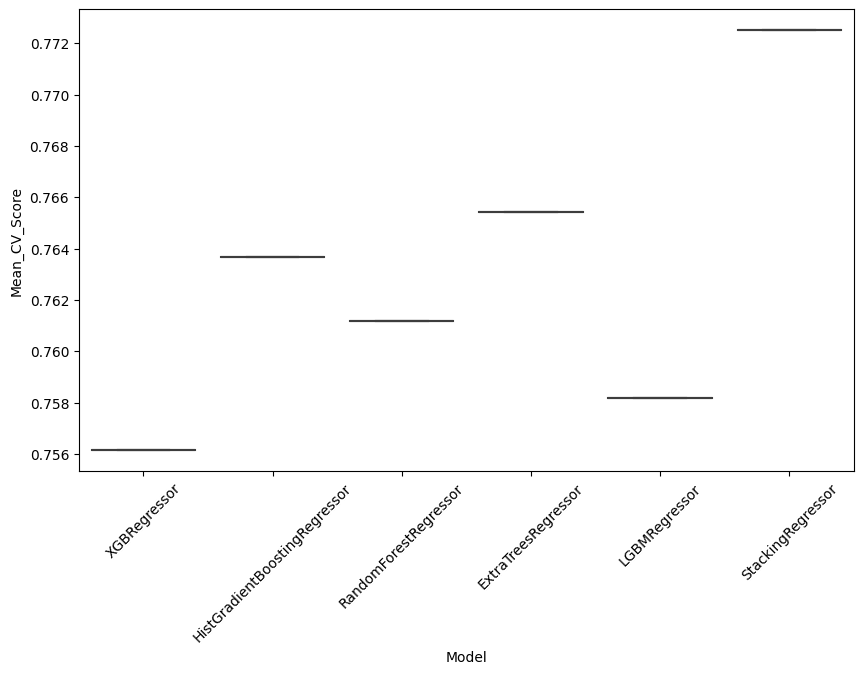

In [167]:
#plot boxplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Model', y='Mean_CV_Score', data=results_df, ax=ax)
plt.xticks(rotation=45)
plt.show()


#### The mean cross validation score represents the average performance of the model across all the k-folds, and the standard deviation represents the spread of the scores. A lower standard deviation indicates that the model is more consistent and stable across different folds.

#### In this case, all the models have a similar mean cross validation score around 0.76. This means that all the models are performing similarly on the training data.
#### the standard deviation of the scores is relatively low (around 0.1) which indicates that the models are stable and consistent across the different folds.

#### The StackingRegressor and ExtraTreesRegressor have a slightly higher mean cross validation score than the other models (0.77) which may indicate that these models are slightly better at generalizing to unseen data.
#### The Stacking regressor is performing better than other models in terms of average accuraty, however it can be an the slower side, since it's very complicated.The optimal model is the EtreesRegressor, although an argument could also be made for the LGBMRegressor since it's the most stable and it's extremely fast.

# <u><p style="text-align: center;">End Of Notebook</p></u>